In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# June 2024
# License: MIT

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

In [3]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=500, n_classes=3, n_clusters_per_class=1, 
                           n_features=2, n_informative=2, n_redundant=0, class_sep=0.8, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [4]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [5]:
print(f'Train accuracy: {clf.score(X_train, y_train):.4f}')
print(f'Test accuracy: {clf.score(X_test, y_test):.4f}')

Train accuracy: 1.0000
Test accuracy: 0.9440


Evaluating the impact of the number of trees

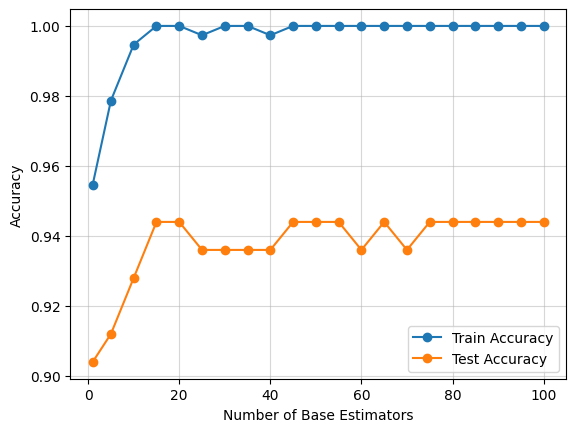

In [6]:
train_accuracies = []
test_accuracies = []
n_estimators_range = [1] + list(range(5, 101, 5))

# Train random forests with varying number of base estimators
for n_estimators in n_estimators_range:
    clf = RandomForestClassifier(n_estimators=n_estimators, random_state=42, n_jobs=-1)
    clf.fit(X_train, y_train)
    train_accuracies.append(clf.score(X_train, y_train))
    test_accuracies.append(clf.score(X_test, y_test))

# Plot the training and test accuracy
plt.plot(n_estimators_range, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(n_estimators_range, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Number of Base Estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.5)
plt.savefig('figures/random_forest_accuracy_curve.pdf')